In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
df=pd.read_csv('Covid.csv')
print(df)

           Date  Unnamed: 1 Unnamed: 2    cases deaths
0    30-01-2020         NaN        NaN      1.0    NaN
1    01-02-2020         NaN        NaN      1.0    NaN
2    02-02-2020         NaN          ?      2.0    NaN
3    03-02-2020         NaN          ?      3.0    NaN
4             ?         NaN          ?      3.0    NaN
..          ...         ...        ...      ...    ...
385         NaN         NaN          ?      NaN    NaN
386         NaN         NaN          ?      NaN    NaN
387  21-07-2020         NaN          ?  13994.0  44(+1
388         NaN         NaN          ?      NaN    NaN
389         NaN         NaN          ?      NaN    NaN

[390 rows x 5 columns]


In [3]:
df.loc[4,'Date']='05-02-2020'
print(df)

           Date  Unnamed: 1 Unnamed: 2    cases deaths
0    30-01-2020         NaN        NaN      1.0    NaN
1    01-02-2020         NaN        NaN      1.0    NaN
2    02-02-2020         NaN          ?      2.0    NaN
3    03-02-2020         NaN          ?      3.0    NaN
4    05-02-2020         NaN          ?      3.0    NaN
..          ...         ...        ...      ...    ...
385         NaN         NaN          ?      NaN    NaN
386         NaN         NaN          ?      NaN    NaN
387  21-07-2020         NaN          ?  13994.0  44(+1
388         NaN         NaN          ?      NaN    NaN
389         NaN         NaN          ?      NaN    NaN

[390 rows x 5 columns]


In [4]:
df=df[['Date','cases']]
df.dropna(inplace=True)
print(df)

           Date    cases
0    30-01-2020      1.0
1    01-02-2020      1.0
2    02-02-2020      2.0
3    03-02-2020      3.0
4    05-02-2020      3.0
..          ...      ...
375  17-07-2020  11066.0
378  18-07-2020  11659.0
381  19-07-2020  12480.0
384  20-07-2020  13274.0
387  21-07-2020  13994.0

[141 rows x 2 columns]


In [5]:
df['next_day_cases']=df['cases'].shift(+1)
print(df)

           Date    cases  next_day_cases
0    30-01-2020      1.0             NaN
1    01-02-2020      1.0             1.0
2    02-02-2020      2.0             1.0
3    03-02-2020      3.0             2.0
4    05-02-2020      3.0             3.0
..          ...      ...             ...
375  17-07-2020  11066.0         10275.0
378  18-07-2020  11659.0         11066.0
381  19-07-2020  12480.0         11659.0
384  20-07-2020  13274.0         12480.0
387  21-07-2020  13994.0         13274.0

[141 rows x 3 columns]


In [6]:
df['daily_cases']=df['cases']-df['next_day_cases']
print(df)

           Date    cases  next_day_cases  daily_cases
0    30-01-2020      1.0             NaN          NaN
1    01-02-2020      1.0             1.0          0.0
2    02-02-2020      2.0             1.0          1.0
3    03-02-2020      3.0             2.0          1.0
4    05-02-2020      3.0             3.0          0.0
..          ...      ...             ...          ...
375  17-07-2020  11066.0         10275.0        791.0
378  18-07-2020  11659.0         11066.0        593.0
381  19-07-2020  12480.0         11659.0        821.0
384  20-07-2020  13274.0         12480.0        794.0
387  21-07-2020  13994.0         13274.0        720.0

[141 rows x 4 columns]


In [7]:
df=df.iloc[1:,:]
print(df)

           Date    cases  next_day_cases  daily_cases
1    01-02-2020      1.0             1.0          0.0
2    02-02-2020      2.0             1.0          1.0
3    03-02-2020      3.0             2.0          1.0
4    05-02-2020      3.0             3.0          0.0
5    08-03-2020      8.0             3.0          5.0
..          ...      ...             ...          ...
375  17-07-2020  11066.0         10275.0        791.0
378  18-07-2020  11659.0         11066.0        593.0
381  19-07-2020  12480.0         11659.0        821.0
384  20-07-2020  13274.0         12480.0        794.0
387  21-07-2020  13994.0         13274.0        720.0

[140 rows x 4 columns]


In [8]:
df=df[['Date','cases','daily_cases']]
print(df) 

           Date    cases  daily_cases
1    01-02-2020      1.0          0.0
2    02-02-2020      2.0          1.0
3    03-02-2020      3.0          1.0
4    05-02-2020      3.0          0.0
5    08-03-2020      8.0          5.0
..          ...      ...          ...
375  17-07-2020  11066.0        791.0
378  18-07-2020  11659.0        593.0
381  19-07-2020  12480.0        821.0
384  20-07-2020  13274.0        794.0
387  21-07-2020  13994.0        720.0

[140 rows x 3 columns]


In [9]:
df['Date']=pd.to_datetime(df.Date)
# print(df)
dt_str=dt.date(2020,1,2)
dt_stp=dt.date(2020,7,21)
no_of_days=dt_stp-dt_str
print(no_of_days)
print(len(df))

201 days, 0:00:00
140


In [10]:
days=[]

for i in range(1,141):
    days.append(i)
print(days)
df["Days"]=days
df

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]


,Date,cases,daily_cases,Days
1,2020-01-02,1.0,0.0,1
2,2020-02-02,2.0,1.0,2
3,2020-03-02,3.0,1.0,3
4,2020-05-02,3.0,0.0,4
5,2020-08-03,8.0,5.0,5
...,...,...,...,...
375,2020-07-17,11066.0,791.0,136
378,2020-07-18,11659.0,593.0,137
381,2020-07-19,12480.0,821.0,138
384,2020-07-20,13274.0,794.0,139


In [11]:

df=df.set_index(df['Days'])
print(df.tail(60))

           Date    cases  daily_cases  Days
Days                                       
81   2020-05-23    794.0         62.0    81
82   2020-05-24    847.0         53.0    82
83   2020-05-25    896.0         49.0    83
84   2020-05-26    963.0         67.0    84
85   2020-05-27   1003.0         40.0    85
86   2020-05-28   1088.0         85.0    86
87   2020-05-29   1150.0         62.0    87
88   2020-05-30   1208.0         58.0    88
89   2020-05-31   1269.0         61.0    89
90   2020-01-06   1326.0         57.0    90
91   2020-02-06   1412.0         86.0    91
92   2020-03-06   1494.0         82.0    92
93   2020-04-06   1588.0         94.0    93
94   2020-05-06   1699.0        111.0    94
95   2020-06-06   1807.0        108.0    95
96   2020-07-06   1914.0        107.0    96
97   2020-08-06   2005.0         91.0    97
98   2020-09-06   2096.0         91.0    98
99   2020-10-06   2161.0         65.0    99
100  2020-11-06   2244.0         83.0   100
101  2020-12-06   2322.0        

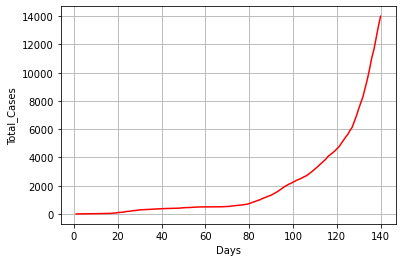

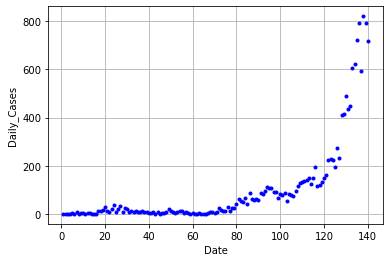

In [12]:
xs=df.index
ys=df['cases']
ys2=df['daily_cases']
#creating plots to visualize data
plt.plot(xs,ys,'r')
plt.xlabel('Days')
plt.ylabel('Total_Cases')
plt.grid()
plt.show()
plt.plot(xs,ys2,'b.')
plt.xlabel('Date')
plt.ylabel('Daily_Cases')
plt.rcParams['figure.figsize']=(8,6)
plt.grid()
plt.show()

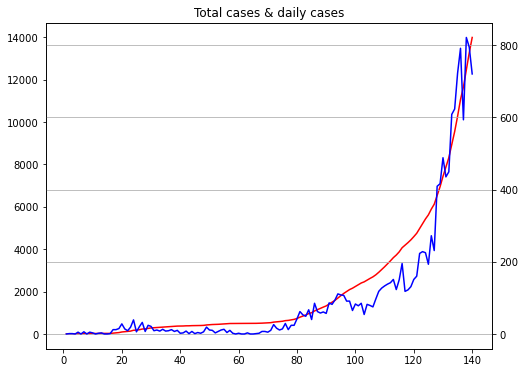

In [13]:
ax1=plt.subplot(1,1,1)
ax2=ax1.twinx()
curve1=ax1.plot(xs,ys,'r',label='Total_Cases')
curve2=ax2.plot(xs,ys2,'b',label='Daily_Cases')
plt.title('Total cases & daily cases')
plt.grid()
plt.show()